# Read in data, apply initial transformations

In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


In [2]:
#REFERENCES
# https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard
# https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset

# Read the data
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

# Remove rows with missing target
df_train.dropna(axis=0, subset=['SalePrice'], inplace=True)

#won't use these later
#drop_features = ['Utilities', 'Condition1', 'Condition2']
#df_train.drop(columns=drop_features, inplace=True)

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
# categorical_features = [cname for cname in df_train.columns if
#                     df_train[cname].nunique() < 10 and 
#                     df_train[cname].dtype == "object"]

# # Select numerical columns
# numerical_features = [cname for cname in df_train.columns if 
#                 df_train[cname].dtype in ['int64', 'float64']]

# #print(f'numerical_features: {numerical_features}')

# # Keep selected columns only
# my_cols = categorical_features + numerical_features
# df_train = df_train[my_cols].copy()


In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [6]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Research & Remove outliers

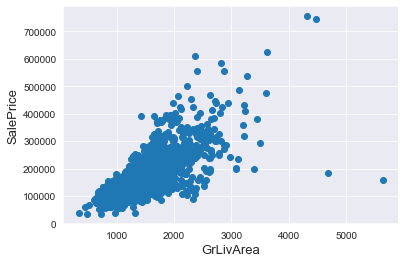

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [8]:
df_train.shape

(1460, 80)

In [9]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

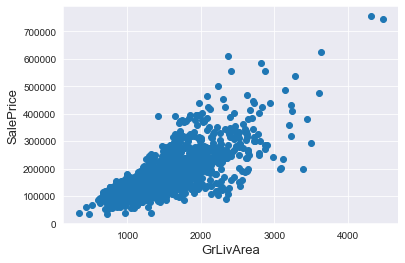

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [11]:
df_train.shape

(1458, 80)

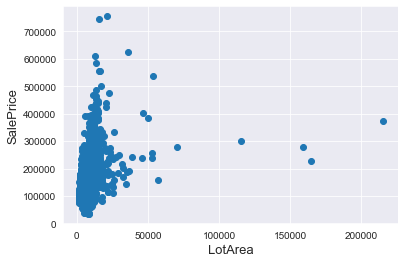

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['LotArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

In [13]:
df_train = df_train.drop(df_train[(df_train['LotArea']>60000)].index)

In [14]:
df_train.shape

(1453, 80)

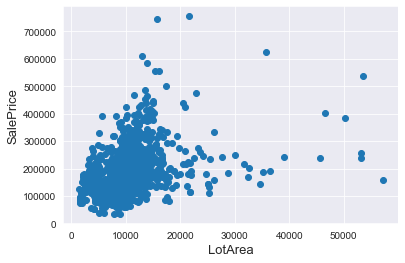

In [15]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['LotArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

## Look at target (SalePrice)


 mu = 180548.69 and sigma = 79284.38



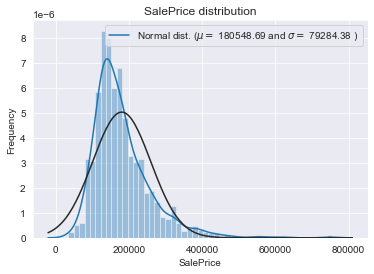

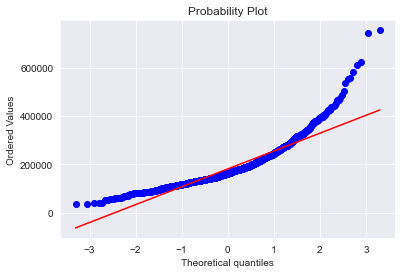

In [16]:
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed.
Log-transformation of the target variable


 mu = 12.02 and sigma = 0.40



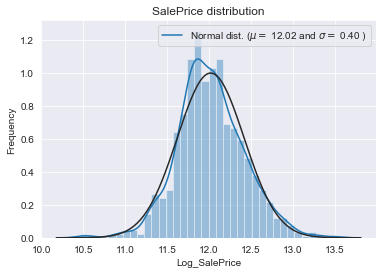

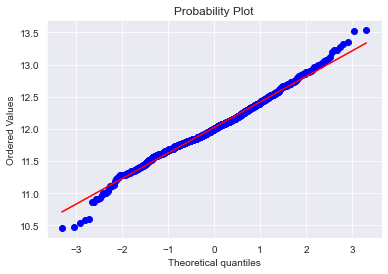

In [17]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["Log_SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['Log_SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['Log_SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['Log_SalePrice'], plot=plt)
plt.show()

Much improved, now drop the skewed SalePrice data

In [18]:
df_train.drop(columns="SalePrice", inplace=True)
df_train.rename(columns={"Log_SalePrice": "SalePrice"}, inplace=True)

In [19]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.248
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429


## Features engineering

In [20]:

train_labels = df_train['SalePrice'].reset_index(drop=True)
train_features = df_train.drop(['SalePrice'], axis=1)
test_features = df_test

ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

print(f'# ntrain: {ntrain}')
print(f'# ntest: {ntest}')
print("all_data size is : {}".format(all_data.shape))


# ntrain: 1453
# ntest: 1459
all_data size is : (2912, 79)


## Understand correlations

<AxesSubplot:>

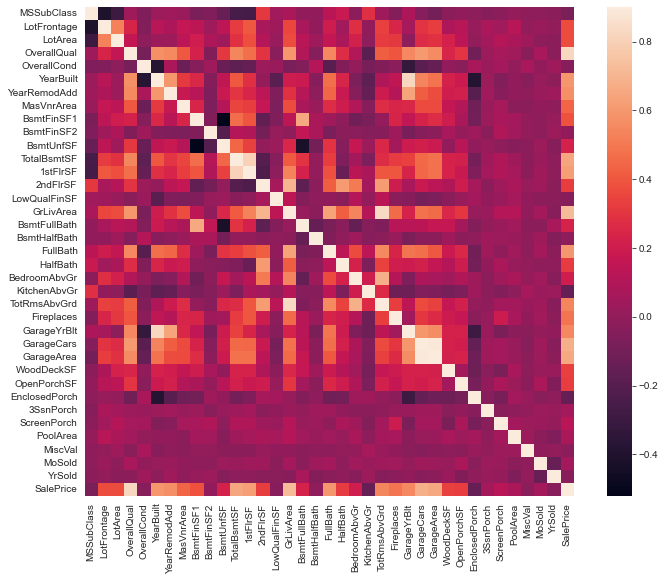

In [21]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [22]:
corr = df_train.corr()
corr_df = corr.unstack().reset_index()
corr_df.head()

,level_0,level_1,0
0,MSSubClass,MSSubClass,1.000
1,MSSubClass,LotFrontage,-0.405
2,MSSubClass,LotArea,-0.290
3,MSSubClass,OverallQual,0.036
4,MSSubClass,OverallCond,-0.061


In [23]:
corr_df[corr_df['level_0'] == "SalePrice"].sort_values(by=0, ascending=False)

,level_0,level_1,0
1368,SalePrice,SalePrice,1.000
1335,SalePrice,OverallQual,0.823
1347,SalePrice,GrLivArea,0.725
1357,SalePrice,GarageCars,0.682
1358,SalePrice,GarageArea,0.657
1343,SalePrice,TotalBsmtSF,0.645
1344,SalePrice,1stFlrSF,0.618
1350,SalePrice,FullBath,0.595
1337,SalePrice,YearBuilt,0.590
1338,SalePrice,YearRemodAdd,0.569


## Fill null values

In [24]:
all_data.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          2903
MiscFeature     2809
Alley           2714
Fence           2341
FireplaceQu     1420
LotFrontage      483
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
dtype: int64

In [25]:
all_data.drop(columns=['Utilities'], inplace=True)

In [26]:
all_data['PoolQC'].fillna("NA", inplace=True)

In [27]:
all_data['MiscFeature'].fillna("NA", inplace=True)

In [28]:
all_data['Alley'].fillna("NA", inplace=True)

In [29]:
all_data['Fence'].fillna("NA", inplace=True)

In [30]:
all_data['FireplaceQu'].fillna("NA", inplace=True)

In [31]:
#use the median from the neighborhood the house is in
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [32]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual'):
    all_data[col] = all_data[col].fillna('NA')

In [33]:
all_data['GarageYrBlt'].fillna(0, inplace=True)

In [34]:
all_data['MasVnrType'].fillna("None", inplace=True)

In [35]:
all_data['MasVnrArea'].fillna(0, inplace=True)

In [36]:
all_data['Electrical'].fillna("SBrkr", inplace=True)

In [37]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [38]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [39]:
all_data['Functional'].fillna("Typ", inplace=True)

In [40]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [41]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [42]:
all_data['GarageCars'].fillna(0, inplace=True)
all_data['GarageArea'].fillna(0, inplace=True)

In [43]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [44]:
#df_train.isnull().sum().sort_values(ascending=False).head(19)

#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(df_train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(19)

,Missing Ratio


## Transforming some numerical variables that are really categorical

In [45]:
all_data[['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']].dtypes

MSSubClass     int64
OverallCond    int64
YrSold         int64
MoSold         int64
dtype: object

In [46]:
all_data['MSSubClass'].value_counts()

20     1076
60      573
50      286
120     182
30      139
70      128
160     128
80      118
90      109
190      60
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [47]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [48]:
all_data[['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']].dtypes

MSSubClass     object
OverallCond    object
YrSold         object
MoSold         object
dtype: object

In [49]:
all_data[['BsmtQual', 'BsmtCond']].head(10)

,BsmtQual,BsmtCond
0,Gd,TA
1,Gd,TA
2,Gd,TA
3,TA,Gd
4,Gd,TA
5,Gd,TA
6,Ex,TA
7,Gd,TA
8,TA,TA
9,TA,TA


In [50]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2912, 78)


In [51]:
all_data[['BsmtQual', 'BsmtCond']].head(10)

,BsmtQual,BsmtCond
0,2,4
1,2,4
2,2,4
3,4,1
4,2,4
5,2,4
6,0,4
7,2,4
8,4,4
9,4,4


### Adding an aggregate feature

In [52]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Check for feature data skew

In [53]:
abs(all_data.skew(axis=0)).sort_values(ascending=False)

MiscVal         21.955
PoolQC          21.210
PoolArea        17.682
Street          16.186
LowQualFinSF    12.080
3SsnPorch       11.368
LandSlope        4.979
KitchenAbvGr     4.299
BsmtFinSF2       4.161
Functional       4.052
EnclosedPorch    4.001
ScreenPorch      3.943
BsmtHalfBath     3.943
GarageYrBlt      3.903
GarageCond       3.592
CentralAir       3.456
LotArea          3.279
GarageQual       3.071
BsmtFinType2     3.050
PavedDrive       2.976
BsmtCond         2.859
MasVnrArea       2.629
OpenPorchSF      2.530
ExterCond        2.495
Fence            1.991
WoodDeckSF       1.840
ExterQual        1.800
KitchenQual      1.451
1stFlrSF         1.264
LotFrontage      1.097
GrLivArea        1.073
TotalSF          1.015
BsmtExposure     1.006
BsmtFinSF1       0.986
BsmtUnfSF        0.920
2ndFlrSF         0.861
TotRmsAbvGrd     0.750
Fireplaces       0.727
HalfBath         0.694
TotalBsmtSF      0.675
Alley            0.651
MoSold           0.646
LotShape         0.622
BsmtFullBat

In [54]:
skew_df = pd.DataFrame(abs(all_data.skew(axis=0)).sort_values(ascending=False), columns=['skew'])
skew_df.shape

(59, 1)

In [55]:
#get features with skew > .75
skew_df = skew_df[skew_df['skew'] >= .75]
skew_df.shape

(37, 1)

In [56]:
skew_df.tail()

,skew
BsmtExposure,1.006
BsmtFinSF1,0.986
BsmtUnfSF,0.920
2ndFlrSF,0.861
TotRmsAbvGrd,0.750


In [57]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

for i in skew_df.index:
    all_data[i] = boxcox1p(all_data[i], boxcox_normmax(all_data[i] + 1))

In [58]:
skew_df = pd.DataFrame(abs(all_data.skew(axis=0)).sort_values(ascending=False), columns=['skew'])
skew_df.head(10)

,skew
PoolQC,17.991
Street,16.186
PoolArea,15.590
3SsnPorch,8.859
LowQualFinSF,8.490
MiscVal,5.291
LandSlope,4.426
BsmtHalfBath,3.791
KitchenAbvGr,3.776
Functional,3.632


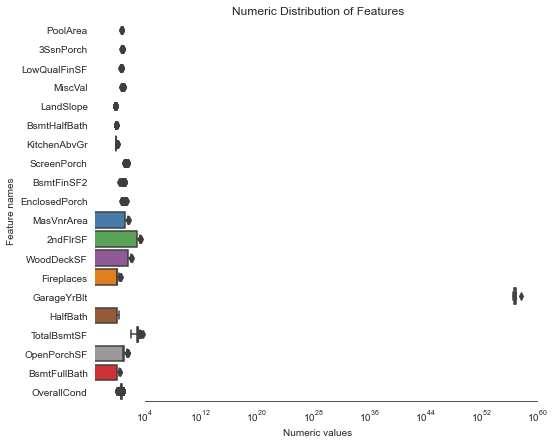

In [59]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_data.columns:
    if all_data[i].dtype in numeric_dtypes:
        numeric.append(i)

skew_features = all_data[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=all_data[skew_index], orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

### Take a look at the data again

In [60]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,10,RL,18.306,37.633,1.520,1,3,Lvl,Inside,0.000,...,0.000,4882.195,6.885,NA,0.000,4,2,WD,Normal,35.296
1,5,RL,20.868,39.056,1.520,1,3,Lvl,FR2,0.000,...,0.000,4882.195,6.885,NA,0.000,7,1,WD,Normal,35.094
2,10,RL,18.836,40.894,1.520,1,0,Lvl,Inside,0.000,...,0.000,4882.195,6.885,NA,0.000,11,2,WD,Normal,35.954
3,11,RL,17.399,38.997,1.520,1,0,Lvl,Corner,0.000,...,0.000,4882.195,6.885,NA,0.000,4,0,WD,Abnorml,34.846
4,10,RL,21.518,43.789,1.520,1,0,Lvl,FR2,0.000,...,0.000,4882.195,6.885,NA,0.000,3,2,WD,Normal,38.683


## TODO Feature transformations

In [61]:
#https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition

#Let's create more features by calculating the log and square transformations of our numerical features. We do this manually, 
#because ML models won't be able to reliably tell if log(feature) or feature^2 is a predictor of the SalePrice.

## Encode categorical features

In [62]:
cat_encoded_df = pd.get_dummies(all_data).reset_index(drop=True)
cat_encoded_df.shape

(2912, 220)

In [63]:
cat_encoded_df.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,18.306,37.633,1.520,1,3,0.000,7,4,2003,...,0,0,0,1,0,0,0,0,1,0
1,5,20.868,39.056,1.520,1,3,0.000,6,7,1976,...,0,0,0,1,0,0,0,0,1,0
2,10,18.836,40.894,1.520,1,0,0.000,7,4,2001,...,0,0,0,1,0,0,0,0,1,0
3,11,17.399,38.997,1.520,1,0,0.000,7,4,1915,...,0,0,0,1,1,0,0,0,0,0
4,10,21.518,43.789,1.520,1,0,0.000,8,4,2000,...,0,0,0,1,0,0,0,0,1,0


In [64]:
cat_encoded_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=220)

In [65]:
cat_encoded_df2 = cat_encoded_df.loc[:,~cat_encoded_df.columns.duplicated()]

In [66]:
cat_encoded_df2.shape

(2912, 220)

## Recreate training and test sets

In [67]:
X = cat_encoded_df.iloc[:len(train_labels), :]
X_test = cat_encoded_df.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((1453, 220), (1453,), (1459, 220))

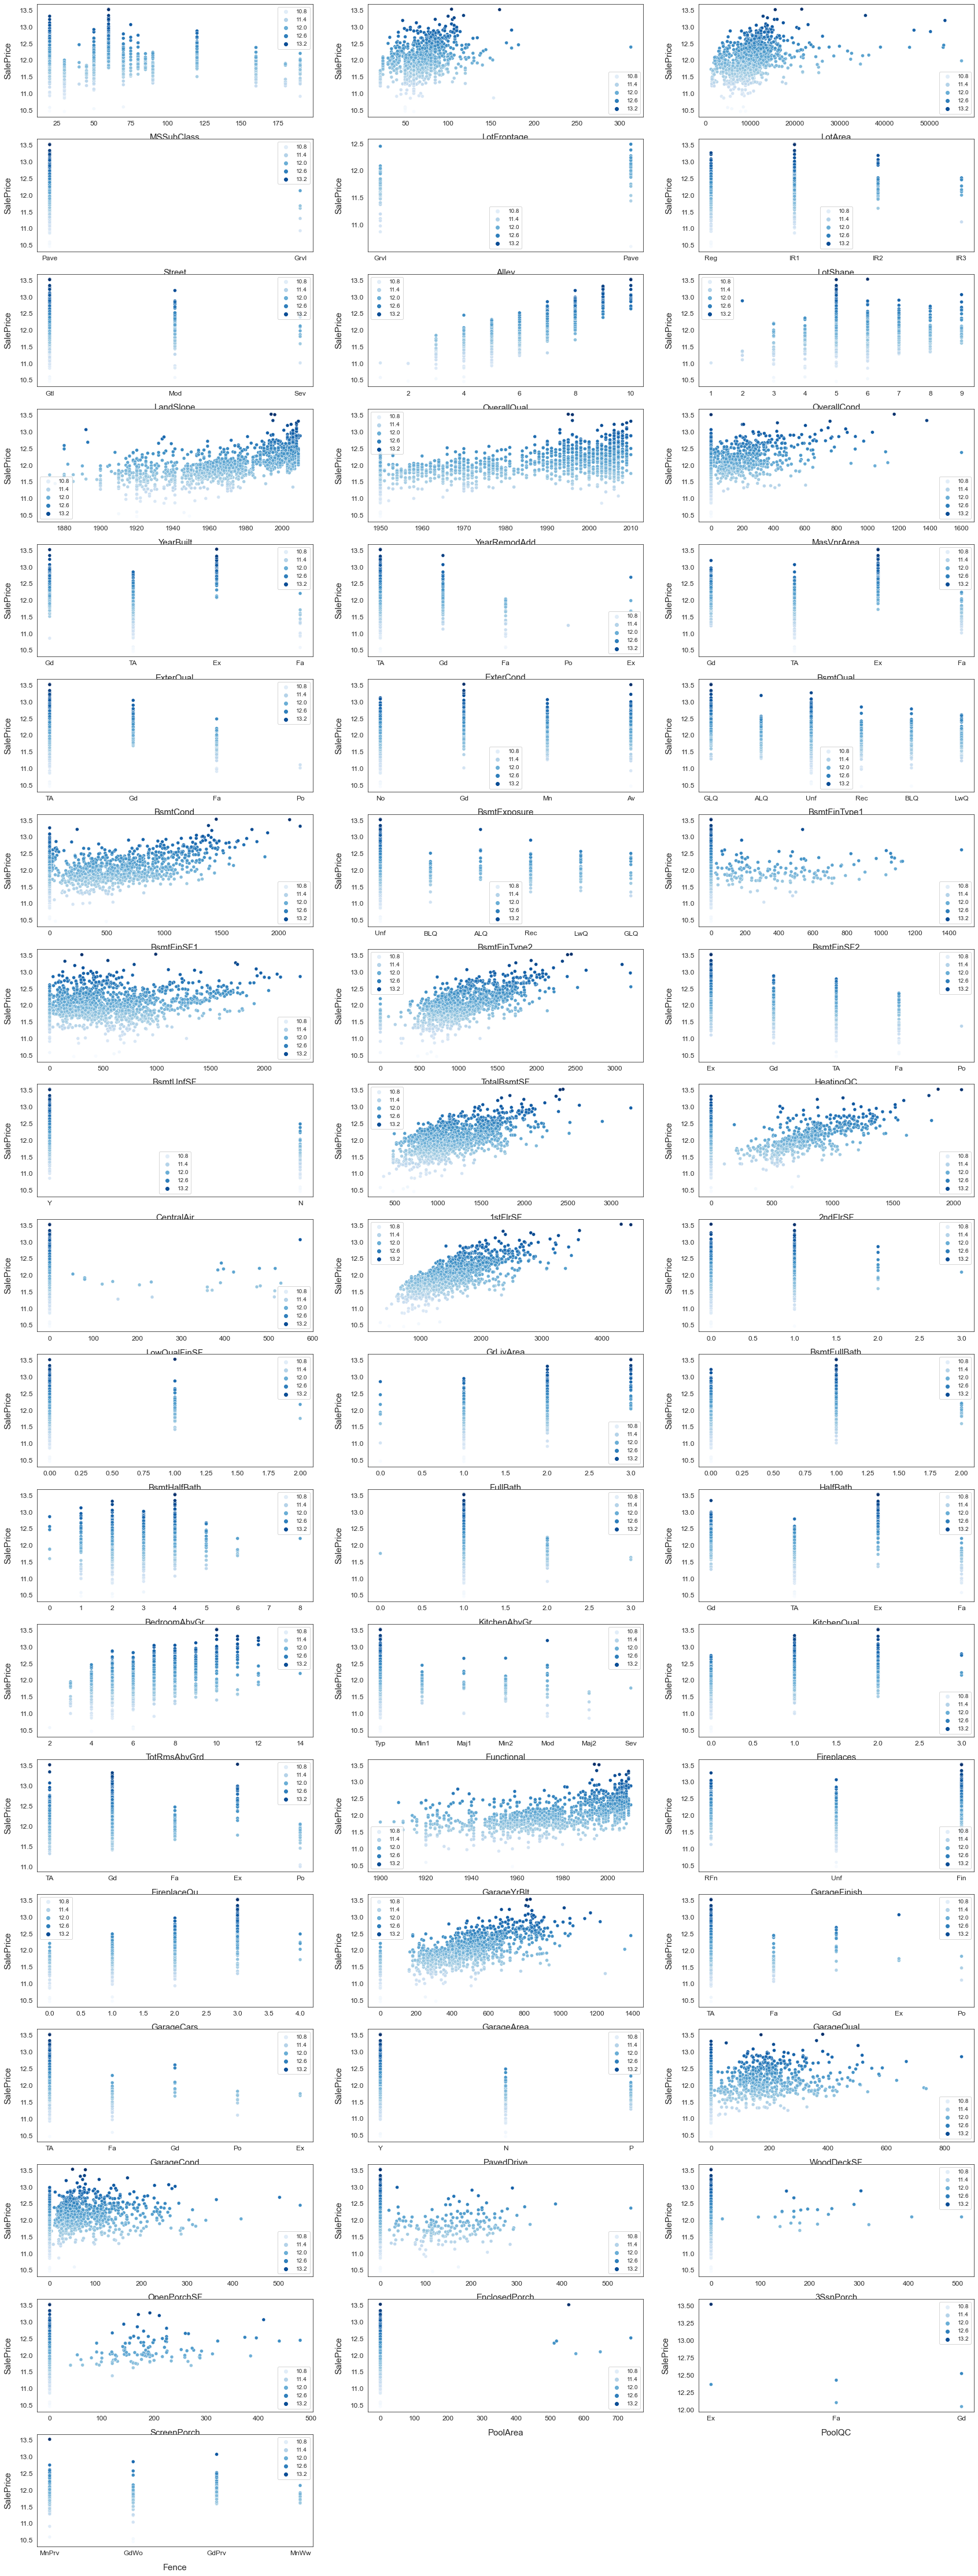

In [68]:
#copy/paste
# Finding numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes:
        if i in ['TotalSF', 'Total_Bathrooms','Total_porch_sf','haspool','hasgarage','hasbsmt','hasfireplace']:
            pass
        else:
            numeric.append(i)   
            

            
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 100))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(X[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=df_train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

## Setup some models!

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [94]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

def cv_r2(model, X, y):
    loop_results = cross_validate(model, X, y, cv=5, scoring='r2')
    return(loop_results['test_score'].mean())

In [95]:
#Linear Regressor
lr = LinearRegression()

In [96]:
# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

In [97]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                           max_depth=15,
                           min_samples_split=5,
                           min_samples_leaf=5,
                           max_features=None,
                           oob_score=True,
                           random_state=42)

In [98]:
# KNN Regressor
knnr = KNeighborsRegressor()

In [99]:
scores = {}

score = cv_rmse(lr)
print(f"lr_rmse: {score.mean()} ({score.std()})")
scores['lr_rmse'] = (score.mean(), score.std())

# score = rmsle(lr, y_train)
# print(f"rmsle: {score.mean()} ({score.std()})")
# scores['lr_rmsle'] = (score.mean(), score.std())

score = cv_r2(lr, y_train)
print(f"lr_cv_r2: {score.mean()} ({score.std()})")
scores['lr_cv_r2'] = (score.mean(), score.std())

TypeError: cv_rmse() missing 1 required positional argument: 'X'